In [70]:
# 114679

# Assignment 2 - Regression and Classification

Second assessed coursework for the course: Técnicas e Algoritmos em Ciência de Dados

This coursework aims to provide students with a comprehensive understanding of linear regression with polynomial basis functions and classification with K-nearest neighbours. Specifically, students will learn about key concepts related to the model's generalisation ability by changing the degree of the polynomial and the size of the dataset. In the second part of the coursework, students will delve into classification using the K-nearest neighbours algorithm. Finally, students will be introduced to the concept of using a validation set to select the optimal value of $K$ for their classification model. By the end of this coursework, students will have gained a solid understanding of these key concepts and be equipped with the skills to apply them in practical scenarios.

## General guidelines:

* This work must be entirely original. You are allowed to research documentation for specific libraries, but copying solutions from the internet or your classmates is strictly prohibited. Any such actions will result in a deduction of points for the coursework.
* Please enter your code in the designated areas of the notebook. You can create additional code cells to experiment with, but __make sure to place your final solutions where they are requested in the notebook.__
* Before submitting your work, make sure to rename the file to the random number that you created for the previous coursework (for example, 289479.ipynb).

## Notebook Overview:

1. [Polynomial Fitting Visualisation](#Polynomial-Fitting-Visualisation) (50%)
2. [Classification with KNN](#Classification-with-KNN) (50%)

In [71]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Polynomial Fitting Visualisation
In this exercise you will explore the effect that the degree of the polynomial and the size of the training data has on the model's performance and generalisation ability.

1. Generate a 2D dataset of 15 points $(x_i,y_i)$ for $i=1..15$ using a sine wave perturbed by a small gaussian noise --- this is very similar to what you did in the lab.
    - The $x_i$ should be equally spaced in the $[0-10]$ interval 
    - Use: $y_i = 4*sin(x_i) + \epsilon$, where $\epsilon$ is gaussian noise (with $\mu=0$ and $\sigma=1$).
    - To ensure reproducibility of your results, use (provided below): 
    `rng = np.random.default_rng(13)` and
    `random_state = np.random.RandomState(13)`
    
2. Split the points randomly into a training and testing sets of size 10 and 5, respectively.
    
3. Learn the weights of the linear regression for  polynomial models of degree $M$ for $M = 0..9$ . For each value of $M$ calculate the Root Mean Squared Error (RMSE) for the training and testing sets and plot these values against $M$. Your figure should be similar to Figure 1 from the Coursework document.

4. In the last part of this exercise, you will have to create more points for training (using the same sine wave perturbed by a small gaussian noise as described in point 1). For testing, you will continue to use the same 5 points you used in points 1 to 3. Learn the weights of the linear regression for  polynomial models of degree $M=9$ for training sets of size $N$ with $N=10:500:10$ (that is, from $N=10$ to $N=500$ in steps of $10$). For each value of $N$ calculate the Root Mean Squared Error (RMSE) for the training and testing sets and plot these values against $N$. Your figure should be similar to Figure 2 from the Coursework document.

* Note that for parts 3 and 4 you are supposed to write your code from scratch and you cannot use existing functions such as `PolynomialFeatures`, `LinearRegression` or `mean_squared_error`.
* _Observation: in this exercise we are not using the validation set because our goal is not to choose a specific model but rather to analyse the behaviour of the family of models._

### Generate the data

In [72]:
rng = np.random.default_rng(13)
random_state = np.random.RandomState(13)

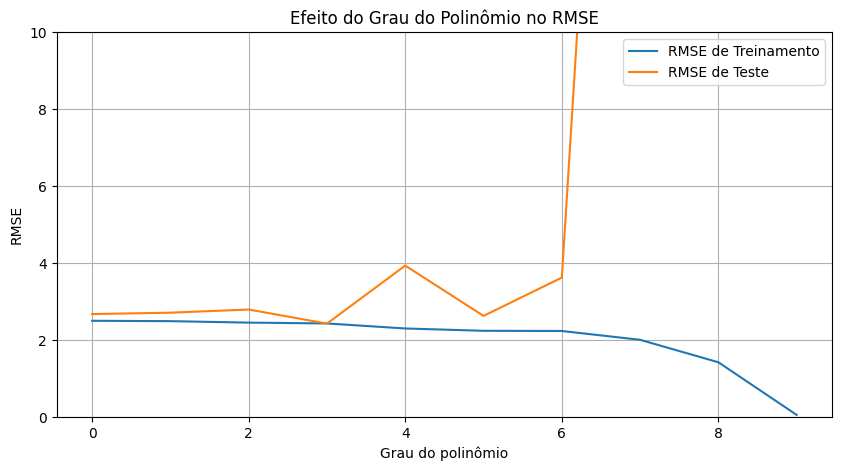

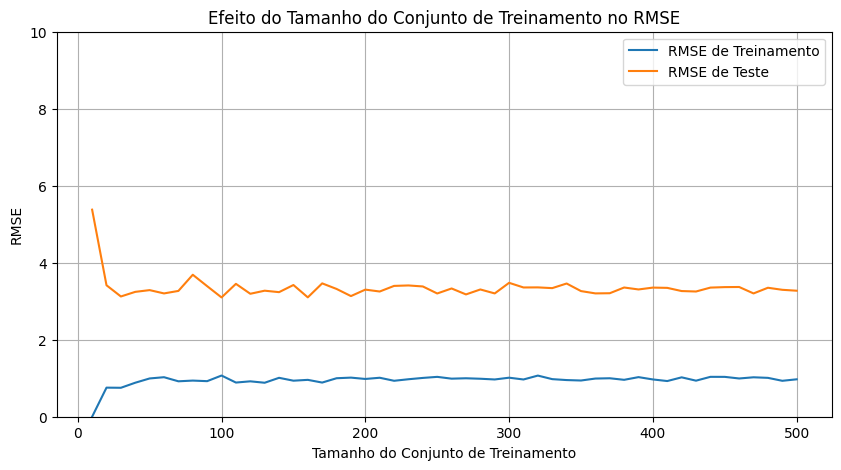

In [73]:
# Vamos gerar os valores de x
x = np.linspace(0, 10, 15)

# Vamos gerar os valores de y com ruído
epsilon = rng.normal(0, 1, size=15)
y = 4 * np.sin(x) + epsilon

# Dividindo o conjunto de dados em conjuntos de treinamento e teste
random_state.shuffle(x)
random_state.shuffle(y)

x_train, x_test = x[:10], x[10:]
y_train, y_test = y[:10], y[10:]

# Agora iremmos calcular o RMSE para diferentes graus de polinômio
def regressao_polinomial(x, y, grau):

    # Matriz de Vandermonde
    X = np.vander(x, grau + 1, increasing=True)
    
    # Calculando pesos usando a equação normal
    pesos = np.linalg.inv(X.T @ X) @ X.T @ y
    
    return pesos

def prever(X, pesos):
    return np.dot(X, pesos)

def calcular_rmse(y_verdadeiro, y_predito):
    return np.sqrt(np.mean((y_verdadeiro - y_predito)**2))

graus = range(10)
erros_treino = []
erros_teste = []

for grau in graus:
    # Ajustando a regressão polinomial
    pesos = regressao_polinomial(x_train, y_train, grau)
    
    # Previsões
    y_treino_predito = prever(np.vander(x_train, grau + 1, increasing=True), pesos)
    y_teste_predito = prever(np.vander(x_test, grau + 1, increasing=True), pesos)
    
    # Cálculo do RMSE
    rmse_treino = calcular_rmse(y_train, y_treino_predito)
    rmse_teste = calcular_rmse(y_test, y_teste_predito)
    
    erros_treino.append(rmse_treino)
    erros_teste.append(rmse_teste)


# GRÁFICO - RMSE vs grau
    
# Criando a figura com um tamanho definido 
plt.figure(figsize=(10, 5))

# Definindo o intervalo do eixo y de 0 a 10
plt.ylim(0, 10)

# Plotando os erros 
plt.plot(graus, erros_treino, label='RMSE de Treinamento')
plt.plot(graus, erros_teste, label='RMSE de Teste')

# Colocando legenda no eixo x 
plt.xlabel('Grau do polinômio')

# Colocando legenda no eixo y 
plt.ylabel('RMSE')

# Colocando título no gráfico 
plt.title('Efeito do Grau do Polinômio no RMSE')

# Colocando legenda ao gráfico
plt.legend()

# Ativa a grade no gráfico
plt.grid(True)

# Exibindo o gráfico
plt.show()

# Avaliando com tamanhos de conjunto de treinamento variáveis
tamanhos_treino = range(10, 501, 10)
erros_treino = []
erros_teste = []

grau = 9  # Grau do polinômio

for tamanho in tamanhos_treino:
    # Gerar novos dados de treinamento
    x_treino_novo = np.linspace(0, 10, tamanho)
    y_treino_novo = 4 * np.sin(x_treino_novo) + rng.normal(0, 1, size=tamanho)
    
    # Ajustar regressão polinomial
    pesos = regressao_polinomial(x_treino_novo, y_treino_novo, grau)
    
    # Previsões
    y_treino_predito = prever(np.vander(x_treino_novo, grau + 1, increasing=True), pesos)
    y_teste_predito = prever(np.vander(x_test, grau + 1, increasing=True), pesos)
    
    # Calcular RMSE
    rmse_treino = calcular_rmse(y_treino_novo, y_treino_predito)
    rmse_teste = calcular_rmse(y_test, y_teste_predito)
    
    erros_treino.append(rmse_treino)
    erros_teste.append(rmse_teste)

# GRÁFICO - RMSE vs tamanho do conjunto de treinamento
    
# Criando a figura com um tamanho definido 
plt.figure(figsize=(10, 5))

# Definindo o intervalo do eixo y de 0 a 10
plt.ylim(0, 10)

# Plotando os erros 
plt.plot(tamanhos_treino, erros_treino, label='RMSE de Treinamento')
plt.plot(tamanhos_treino, erros_teste, label='RMSE de Teste')

# Colocando legenda no eixo x 
plt.xlabel('Tamanho do Conjunto de Treinamento')

# Colocando legenda no eixo y 
plt.ylabel('RMSE')

# Colocando título no gráfico 
plt.title('Efeito do Tamanho do Conjunto de Treinamento no RMSE')

# Colocando legenda ao gráfico
plt.legend()

# Ativa a grade no gráfico
plt.grid(True)

# Exibindo o gráfico
plt.show()


### Split the points into training and testing
Feel free to use `train_test_split(x, y, test_size = ?, random_state = random_state)`, remember to calculate the right proportion for the `test_size` so that you end up with 5 points in the testing set.

In [74]:
# Separando os dados em dados de treino e em dados de teste 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=5, random_state=random_state)


### Degree vs. RMSE
Generate the plot (as in __Figure 1__) of the RMSE during training and testing at different values of of the polynomial degree $M$.

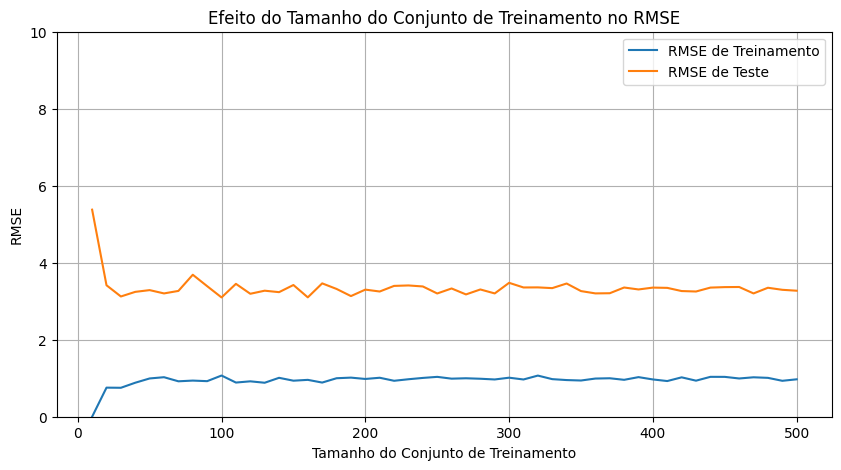

In [75]:
# Garantindo a aleatoriedade do conjunto 
random_state.shuffle(x)
random_state.shuffle(y)

# Dividindo o conjunto de dados em conjuntos de treinamento e teste
# Aqui, os primeiros 10 pontos de dados são usados como treinamento e os restantes como teste
x_train, x_test = x[:10], x[10:]
y_train, y_test = y[:10], y[10:]

#Definindo uma função para ajustar regressão polinomial e calcular o RMSE para diferentes graus de polinômios

def polynomial_regression(x, y, degree):
    # Matriz de Vandermonde
    X = np.vander(x, degree + 1, increasing=True)
    
    # Calculando pesos usando a equação normal
    weights = np.linalg.inv(X.T @ X) @ X.T @ y
    
    return weights

def predict(X, weights):
    return np.dot(X, weights)

def calculate_rmse(y_true, y_pred):
    # Calculando o RMSE (Erro Quadrático Médio)
    return np.sqrt(np.mean((y_true - y_pred)**2))

# Graus de polinômios a serem avaliados
degrees = range(10)

# Listas para armazenar erros de treinamento e teste para cada grau de polinômio
train_errors = []
test_errors = []

# Loop para cada grau de polinômio
for degree in degrees:
    # Ajustando regressão polinomial
    weights = polynomial_regression(x_train, y_train, degree)
    
    # Fazendo previsões para conjunto de treinamento e teste
    y_train_pred = predict(np.vander(x_train, degree + 1, increasing=True), weights)
    y_test_pred = predict(np.vander(x_test, degree + 1, increasing=True), weights)
    
    # Calculando RMSE para conjunto de treinamento e teste
    train_rmse = calculate_rmse(y_train, y_train_pred)
    test_rmse = calculate_rmse(y_test, y_test_pred)
    
    # Armazenando RMSEs em listas correspondentes
    train_errors.append(train_rmse)
    test_errors.append(test_rmse)


# GRÁFICO - RMSE vs tamanho do conjunto de treinamento

# Criando a figura com um tamanho definido 
plt.figure(figsize=(10, 5))

# Definindo o intervalo do eixo y de 0 a 10
plt.ylim(0, 10)

# Plotando os erros 
plt.plot(tamanhos_treino, erros_treino, label='RMSE de Treinamento')  # Plotando RMSE de treinamento em função do tamanho do conjunto de treinamento
plt.plot(tamanhos_treino, erros_teste, label='RMSE de Teste')  # Plotando RMSE de teste em função do tamanho do conjunto de treinamento

# Colocando legenda no eixo x 
plt.xlabel('Tamanho do Conjunto de Treinamento')

# Colocando legenda no eixo y 
plt.ylabel('RMSE')

# Colocando título no gráfico 
plt.title('Efeito do Tamanho do Conjunto de Treinamento no RMSE')

# Colocando legenda ao gráfico
plt.legend()

# Ativa a grade no gráfico
plt.grid(True)

# Exibindo o gráfico
plt.show()



### Training set size vs. RMSE
Generate the plot (as in __Figure 2__) of the RMSE during training and testing at different training set sizes $N$.

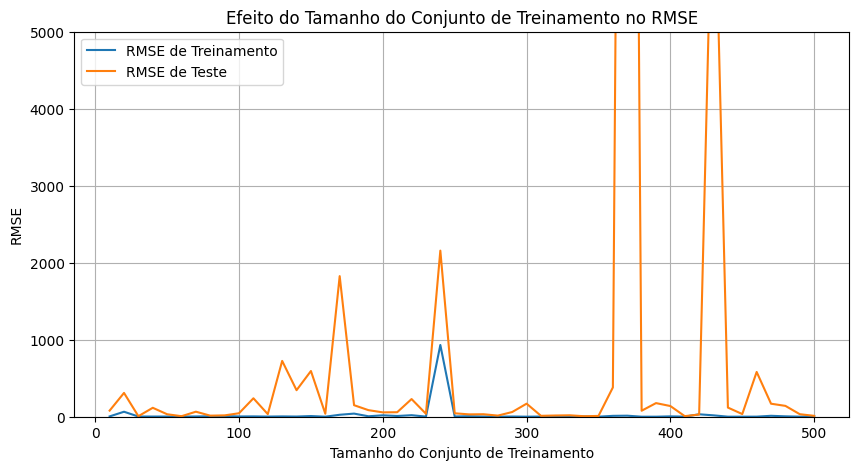

In [76]:
# Gerando conjunto de dados
rng = np.random.default_rng(13)  
random_state = np.random.RandomState(13)  

# Gerando valores de x
x = np.linspace(0, 10, 15)

# Gerando valores de y com ruído
epsilon = rng.normal(0, 1, size=15)  
y = 4 * np.sin(x) + epsilon  

# Embaralhando x e y para garantir aleatoriedade
random_state.shuffle(x)  
random_state.shuffle(y)  

# Dividindo em conjunto de teste e conjunto restante
x_test, x_remainder = x[-5:], x[:-5]
y_test, y_remainder = y[-5:], y[:-5]

# Ajuste polinomial e cálculo do RMSE para diferentes tamanhos de conjunto de treinamento
def polynomial_regression(x, y, degree):
    # Matriz de Vandermonde
    X = np.vander(x, degree + 1, increasing=True)
    
    # Calculando pesos usando equação normal
    weights = np.linalg.inv(X.T @ X) @ X.T @ y
    
    return weights

def predict(X, weights):
    return np.dot(X, weights)

def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

train_sizes = range(10, 501, 10)
train_errors = []
test_errors = []

degree = 9  # Grau do polinômio

for size in train_sizes:
    # Dividindo resto em conjuntos de treinamento e teste
    x_train, x_test_temp, y_train, y_test_temp = train_test_split(x_remainder, y_remainder, test_size=5, random_state=random_state)
    
    # Concatenando novos dados de teste com dados de teste existentes
    x_test_new = np.concatenate((x_test, x_test_temp))
    y_test_new = np.concatenate((y_test, y_test_temp))
    
    # Ajustando regressão polinomial
    weights = polynomial_regression(x_train, y_train, degree)
    
    # Previsões
    y_train_pred = predict(np.vander(x_train, degree + 1, increasing=True), weights)
    y_test_pred = predict(np.vander(x_test_new, degree + 1, increasing=True), weights)
    
    # Calculando RMSE
    train_rmse = calculate_rmse(y_train, y_train_pred)
    test_rmse = calculate_rmse(y_test_new, y_test_pred)
    
    train_errors.append(train_rmse)
    test_errors.append(test_rmse)

# Gráfico - Plotando RMSE vs tamanho de conjunto de treinamento

# Criando a figura com um tamanho definido 
plt.figure(figsize=(10, 5))

# Definindo o intervalo do eixo y de 0 a 10
plt.ylim(0, 5000)

# Plotando os erros 
plt.plot(train_sizes, train_errors, label='RMSE de Treinamento')  # Plotando RMSE de treinamento em função do tamanho do conjunto de treinamento
plt.plot(train_sizes, test_errors, label='RMSE de Teste')  # Plotando RMSE de teste em função do tamanho do conjunto de treinamento

# Colocando legenda no eixo x 
plt.xlabel('Tamanho do Conjunto de Treinamento')

# Colocando legenda no eixo y 
plt.ylabel('RMSE')

# Colocando título no gráfico 
plt.title('Efeito do Tamanho do Conjunto de Treinamento no RMSE')

# Colocando legenda ao gráfico
plt.legend()

# Ativa a grade no gráfico
plt.grid(True)

# Exibindo o gráfico
plt.show()


# Classification with KNN
In this exercise you will implement the K-nearest neighbours (K-NN) algorithm for multi-class classification and use it to classify the Wine dataset. You will also need to determine the optimal value of $K$ using the accuracy on a validation set and report the test set performance based on the accuracy.

Dataset: The Wine dataset contains the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. The dataset contains 178 observations, with 13 attributes each. There are three different classes of wines.

Specifically:
1. 1.	Load the Wine dataset and split it into a training set ($70\%$), a validation set ($15\%$), and a testing set ($15\%$).
    
2. You will write code that implements the K-NN algorithm for multi-class classification. Use Euclidean distance as the distance metric.
    - _Obs: it is better if you take only odd values of K, considering you are predicting the class based on the majority of the neighbours._


3. Use the K-NN algorithm on the training set for a range of values of $K$ and evaluate its performance on the validation set using the accuracy. Plot the accuracy on the validation set against the range of values that were tried for $K$. Your plot should look like Figure 3. 
    - *Observation: it is better if you take only odd values of K, considering you are predicting the class based on the majority of the neighbours.*
    - **You will also have to implement the accuracy-score from scratch.**


4. 	Choose the value of $K$ that gives the best accuracy score in point 3 and report the accuracy of the K-NN algorithm on the test set using the selected value of $K$.
	- *Observation: when obtaining the predictions for the testing set, remember to include the validation set in your training set.*



* __Note:__ You are not allowed to use any Python libraries such as scikit-learn to implement the K-NN algorithm or to calculate distances or the accuracy score. You may use numpy or other basic libraries for matrix operations.
    
    

### Preparing the dataset

Load the dataset and generate the training, validation and testing sets.

In [77]:
X_wine = pd.read_csv('X_wine.csv')
y_wine = pd.read_csv('y_wine.csv')

Let's inspect the dataset. There are 13 features and one target column

In [78]:
X_wine.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


We can inspect the class distribution by using `value_counts()` on the target variable

In [79]:
y_wine.value_counts()

class
2        71
1        59
3        48
Name: count, dtype: int64

Now you will write code to split the data into training ($70\%$), validation ($15\%$), and testing ($15\%$). 

You can use `train_test_split()` but make sure to calculate the right proportions and remember that this only returns 2 different sets, not 3.

In [80]:
random_state = 113

In [81]:
X_wine = pd.read_csv('X_wine.csv')
y_wine = pd.read_csv('y_wine.csv')

random_state = 113

# Dividindo os conjuntos de dados 
X_train_val, X_test, y_train_val, y_test = train_test_split(X_wine, y_wine, test_size=0.15, random_state=random_state)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=random_state)


### Here you will implement the KNN algorithm using the euclidean distance

In [1]:
# Função para calcular a distância euclidiana entre dois pontos
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# Classe para implementar o algoritmo k-Nearest Neighbors
class KNN:
    # Método de inicialização
    def __init__(self, k=3):
        self.k = k  # Número de vizinhos
    
    # Método para ajustar o modelo aos dados de treinamento
    def fit(self, X, y):
        # Conjunto de treinamento
        self.X_train = X 
        # Rótulos dos dados de treinamento 
        self.y_train = y  
    
    # Método para fazer previsões para novos pontos
    def predict(self, X):
        # Para cada novo ponto em X, faz a previsão usando o método _predict
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)  # Retorna as previsões em um array numpy
    
    # Método para fazer previsões para um único ponto
    def _predict(self, x):
        # Calcula as distâncias entre o ponto x e todos os pontos de treinamento
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Obtém os índices dos k vizinhos mais próximos
        k_indices = np.argsort(distances)[:self.k]
        # Obtém os rótulos dos k vizinhos mais próximos
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Encontra o rótulo mais comum entre os vizinhos mais próximos
        most_common = np.argmax(np.bincount(k_nearest_labels))
        return most_common  # Retorna o rótulo mais comum


In [2]:
def knn_predict(X_train, y_train, x, k):
    distances = []
    # Calcula a distância euclidiana entre x e cada ponto em X_train
    for i in range(len(X_train)):
        distance = np.sqrt(np.sum(np.square(x - X_train[i])))
        distances.append((distance, y_train[i]))
    
    # Ordena as distâncias
    distances = sorted(distances)
    
    # Seleciona os k vizinhos mais próximos
    neighbors = distances[:k]
    
    # Conta as ocorrências de cada classe entre os k vizinhos
    class_votes = {}
    for neighbor in neighbors:
        label = neighbor[1]
        class_votes[label] = class_votes.get(label, 0) + 1
    
    # Determina a classe majoritária
    majority_class = max(class_votes, key=class_votes.get)
    
    return majority_class


### Select the optimal $K$ by plotting the accuracy score in the validation set at different values of $K$

First create a function that calculates the accuracy score

In [84]:
def calculate_acc_score(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

Generate the plot and select the optimal $K$

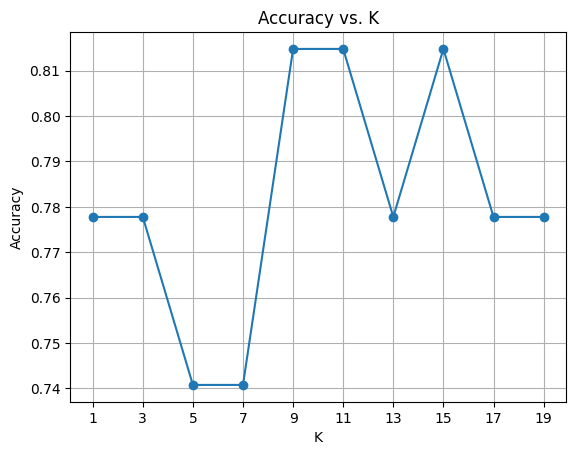

Optimal K value: 9


In [85]:
import numpy as np

# Initialize lists to store accuracy scores
accuracy_scores = []

# Define range of K values
k_values = range(1, 20, 2)

# Iterate over each K value
for k in k_values:
    # Initialize KNN classifier with current K value
    knn = KNN(k=k)
    knn.fit(X_train.to_numpy(), y_train.to_numpy().ravel())
    
    # Predict on the validation set
    y_pred_val = knn.predict(X_val.to_numpy())
    
    # Calculate accuracy on the validation set
    accuracy = calculate_acc_score(y_val.to_numpy().ravel(), y_pred_val)
    accuracy_scores.append(accuracy)

# Plot accuracy vs. K
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Accuracy vs. K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


# Select the optimal K value
optimal_k = k_values[np.argmax(accuracy_scores)]
print("Optimal K value:", optimal_k)




Calculate the test set performance using the optimal $K$

In [86]:
# Treinando o modelo com o valor ótimo de K usando tanto os conjuntos de treinamento quanto de validação
# Inicializa o classificador KNN com o valor ótimo de K
knn = KNN(k=optimal_k)  

# Treina o modelo com os conjuntos de treinamento e validação combinados
knn.fit(X_train_val.to_numpy(), y_train_val.to_numpy().ravel())  

# Prever no conjunto de teste
y_pred_test = knn.predict(X_test.to_numpy())

# Calcular a acurácia no conjunto de teste
test_accuracy = calculate_acc_score(y_test.to_numpy().ravel(), y_pred_test)
print("Acurácia no conjunto de teste com K ótimo (K={}): {:.2f}%".format(optimal_k, test_accuracy * 100))


Acurácia no conjunto de teste com K ótimo (K=9): 62.96%
